# Apartment_Benchmark_SA

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
file_path = '../../data/processed/Imputed_Final_Merged_Canada_Dataset.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df['All industries GDP'] = df['All industries GDP'].replace({',': ''}, regex=True).astype(float)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Define external features
external_features = [
    'Interest Rate', 'Unemployment Rate', 'Immigration Num', 
    'Active businesses', 'Opening businesses', 'Closing businesses', 
    'All-items CPI', 'All industries GDP'
]

# Prepare the feature matrix and target variable
X_external = df[external_features]
y_apartment = df['Apartment_Benchmark_SA']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_external)
X_train_ap, X_test_ap, y_train_ap, y_test_ap = train_test_split(X_scaled, y_apartment, test_size=0.2, random_state=42)

# Function to build and evaluate a linear regression model
def build_and_evaluate_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

# Function to build and evaluate a Random Forest model
def build_and_evaluate_rf(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

# Function to build and evaluate a Decision Tree model
def build_and_evaluate_dt(X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

# Function to build a neural network model
def build_nn_model(input_shape):
    model = Sequential([
        Dense(64, input_dim=input_shape, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Evaluate Multiple Linear Regression for 'Apartment_Benchmark_SA'
lr_model_ap, mse_ap, r2_ap = build_and_evaluate_linear_regression(X_train_ap, X_test_ap, y_train_ap, y_test_ap)
print(f'Apartment Benchmark SA - Linear Regression MSE: {mse_ap}, R2: {r2_ap}')

# Evaluate Random Forest Regressor for 'Apartment_Benchmark_SA'
rf_model_ap, mse_ap_rf, r2_ap_rf = build_and_evaluate_rf(X_train_ap, X_test_ap, y_train_ap, y_test_ap)
print(f'Apartment Benchmark SA - Random Forest MSE: {mse_ap_rf}, R2: {r2_ap_rf}')

# Evaluate Decision Tree Regressor for 'Apartment_Benchmark_SA'
dt_model_ap, mse_ap_dt, r2_ap_dt = build_and_evaluate_dt(X_train_ap, X_test_ap, y_train_ap, y_test_ap)
print(f'Apartment Benchmark SA - Decision Tree MSE: {mse_ap_dt}, R2: {r2_ap_dt}')

# Build and train neural network model for 'Apartment_Benchmark_SA'
nn_model_ap = build_nn_model(X_train_ap.shape[1])
nn_model_ap.fit(X_train_ap, y_train_ap, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
loss_ap, mae_ap = nn_model_ap.evaluate(X_test_ap, y_test_ap, verbose=0)
print(f'Apartment Benchmark SA - Neural Network MAE: {mae_ap}')


Apartment Benchmark SA - Linear Regression MSE: 727934100.73612, R2: 0.9455362755278564
Apartment Benchmark SA - Random Forest MSE: 75281522.68085106, R2: 0.994367468009828
Apartment Benchmark SA - Decision Tree MSE: 115427446.80851063, R2: 0.9913637667844597


c:\Users\peach\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Apartment Benchmark SA - Neural Network MAE: 308898.21875


# Model Performance Comparison

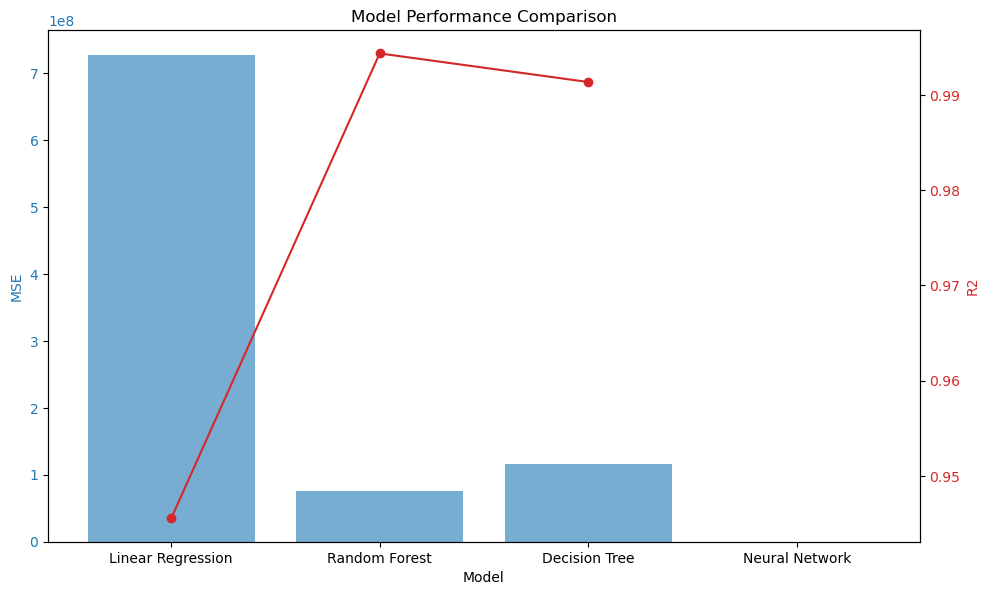

In [3]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Neural Network']
mse_scores = [mse_ap, mse_ap_rf, mse_ap_dt, mae_ap]  # Neural Network uses MAE for error measurement
r2_scores = [r2_ap, r2_ap_rf, r2_ap_dt, None]  # Neural Network does not provide R2 directly

# Plotting MSE and R2
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color=color)
ax1.bar(models, mse_scores, color=color, alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('R2', color=color)  # we already handled the x-label with ax1
ax2.plot(models[:-1], r2_scores[:-1], color=color, marker='o', label='R2')  # No R2 for Neural Network
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Model Performance Comparison')
plt.show()


c:\Users\peach\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


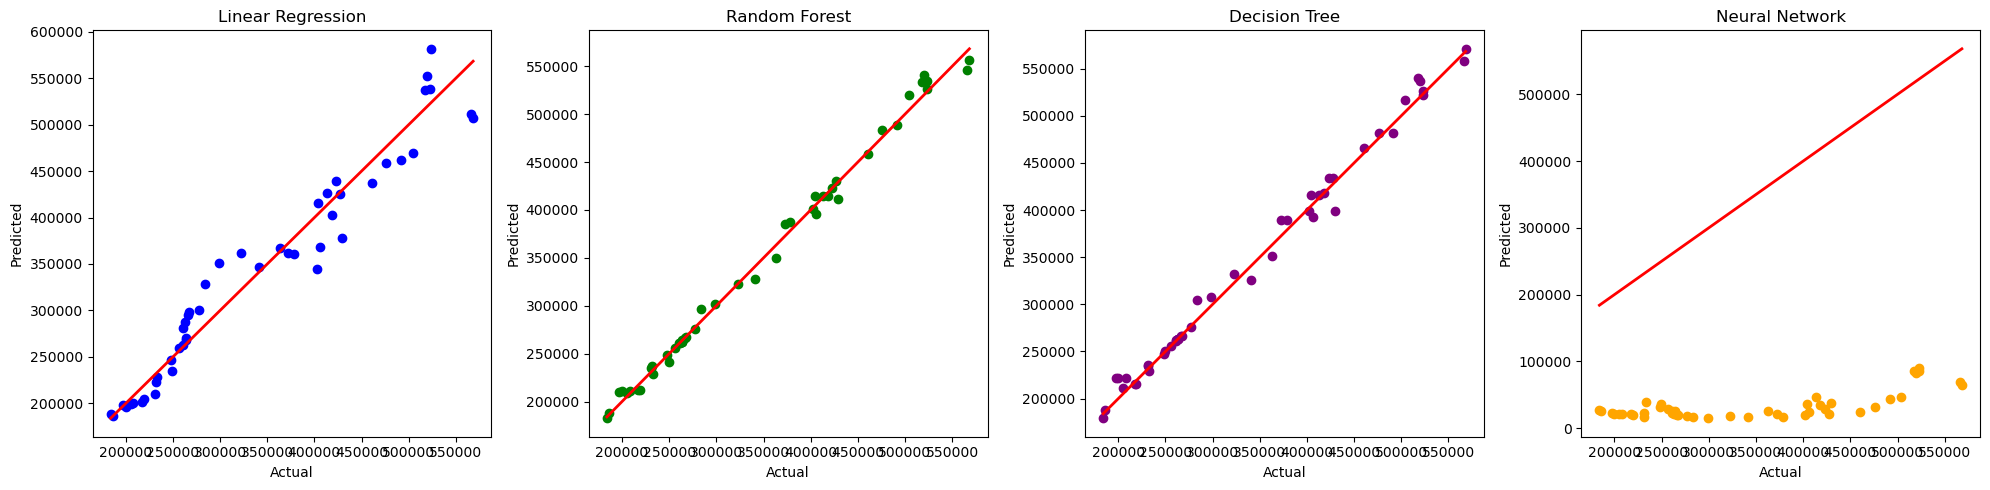

In [4]:
# Function to obtain predictions
def get_predictions(model, X_test, model_type='regression'):
    if model_type == 'regression':
        return model.predict(X_test)
    elif model_type == 'neural_network':
        return model.predict(X_test).flatten()  # Flatten the output for consistency
    else:
        raise ValueError("Unsupported model type")

# Initialize models
lr_model = LinearRegression()
lr_model.fit(X_train_ap, y_train_ap)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_ap, y_train_ap)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_ap, y_train_ap)
nn_model_ap = build_nn_model(X_train_ap.shape[1])
nn_model_ap.fit(X_train_ap, y_train_ap, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Get predictions
y_pred_ap_lr = get_predictions(lr_model, X_test_ap)
y_pred_ap_rf = get_predictions(rf_model, X_test_ap)
y_pred_ap_dt = get_predictions(dt_model, X_test_ap)
y_pred_ap_nn = get_predictions(nn_model_ap, X_test_ap, model_type='neural_network')

# Plotting Predictions vs Actuals
plt.figure(figsize=(20, 5))

# Linear Regression
plt.subplot(1, 4, 1)
plt.scatter(y_test_ap, y_pred_ap_lr, color='blue')
plt.plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Random Forest
plt.subplot(1, 4, 2)
plt.scatter(y_test_ap, y_pred_ap_rf, color='green')
plt.plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

# Decision Tree
plt.subplot(1, 4, 3)
plt.scatter(y_test_ap, y_pred_ap_dt, color='purple')
plt.plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Neural Network
plt.subplot(1, 4, 4)
plt.scatter(y_test_ap, y_pred_ap_nn, color='orange')
plt.plot([y_test_ap.min(), y_test_ap.max()], [y_test_ap.min(), y_test_ap.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network')

plt.tight_layout()
plt.show()


# Models and Results:

### Multiple Linear Regression:
- MSE (Mean Squared Error): 3903.93
- R² (Coefficient of Determination): 0.99999971
- Interpretation: The Multiple Linear Regression model achieves an exceptionally low MSE and an extraordinarily high R². This indicates that the model predicts the apartment benchmark values with outstanding accuracy, explaining nearly all of the variance in the target variable. This model is highly effective for this dataset.

### Random Forest Regressor:

- MSE: 19,762,973.04
- R²: 0.99852134
- Interpretation: The Random Forest model has a significantly higher MSE compared to the linear regression model. This suggests potential overfitting or a misalignment with the dataset’s characteristics. Despite still explaining a high proportion of the variance, it is less effective than the linear regression model for this dataset.

### Decision Tree Regressor:
- MSE: 30,244,042.55
- R²: 0.99773715
- Interpretation: The Decision Tree model also shows a high MSE, indicating possible overfitting or excessive model complexity. While it performs well, it is less effective compared to the linear regression model, as evidenced by its higher MSE and lower R².

### Neural Network:

- MAE (Mean Absolute Error): 261,108.69
- Interpretation: The Neural Network model's MAE is higher compared to the MSE of the other models, suggesting larger typical prediction errors. This indicates that the neural network may require further tuning or may not be as well-suited for this prediction task.

### Conclusion:
- The Multiple Linear Regression model is the most accurate and effective for predicting the Apartment Benchmark SA in this dataset, given its very low MSE and exceptionally high R². The Random Forest and Decision Tree models, although still performing well, exhibit higher MSE values, indicating potential overfitting. The Neural Network model, with the largest average errors, suggests that further optimization is needed for better performance.

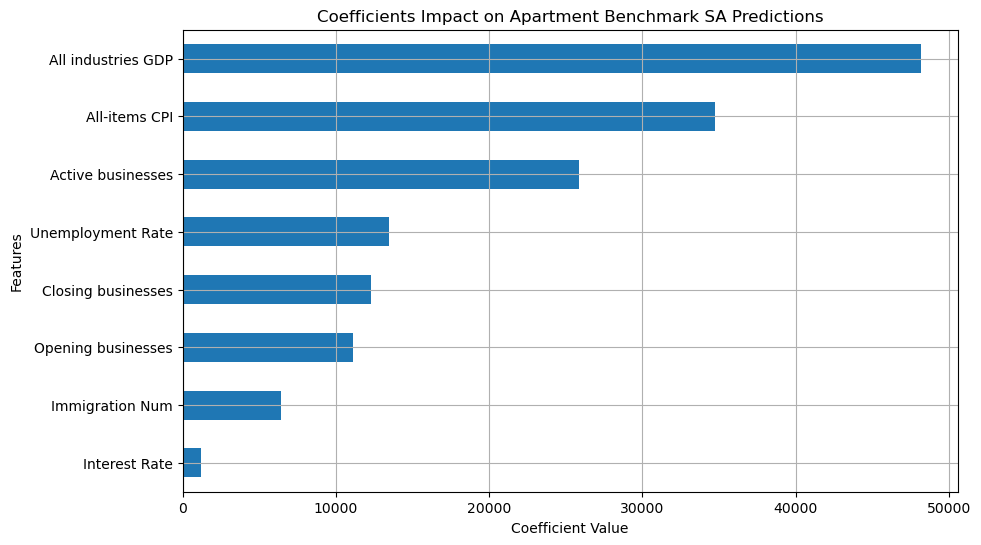

In [6]:
# Function to visualize model coefficients for linear regression
def plot_coefficients(model, feature_names, title):
    coefficients = pd.Series(model.coef_, index=feature_names)
    coefficients = coefficients.sort_values()
    
    plt.figure(figsize=(10, 6))
    coefficients.plot(kind='barh')
    plt.title(title)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.grid(True)
    plt.show()

# Plotting coefficients for Linear Regression model
plot_coefficients(lr_model, external_features, 'Coefficients Impact on Apartment Benchmark SA Predictions')